# Virus detection system

Mastering Machine Learning for Penetration Testing: https://amzn.to/2EpcBbz

#  malware detection system


Exploring the malware dataset.

Malware Dataset:https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing/blob/master/Chapter03/MalwareData.csv.gz


41,323 binaries (exe ,dll) - legitimate

96,724 malware files from virusshare.com


In [1]:
import pandas as pd
import pickle
malData = pd.read_csv("MalwareData.csv",sep = "|" )
legit = malData[0:41323].drop(["legitimate"] ,axis=1)
mal = malData[41323::].drop(["legitimate"],axis=1)

print("The shape of the legit dataset is: %s samples, %s features"%(legit. shape[0], legit. shape[1]))
print("The shape of the malware  dataset is: %s samples, %s features"%(mal. shape[0], mal. shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the malware  dataset is: 96724 samples, 56 features


In [2]:
print(malData.columns)

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [3]:
print(malData.head(5))

           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3 

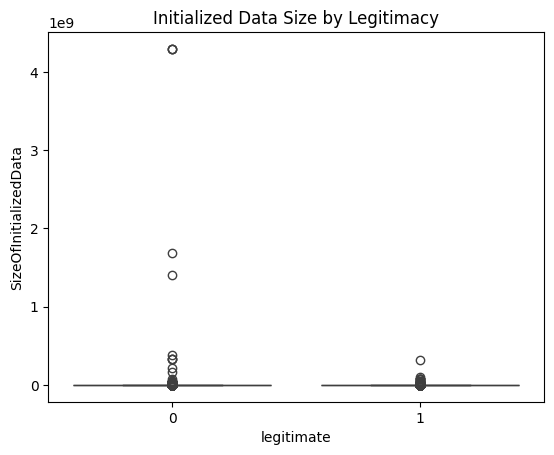

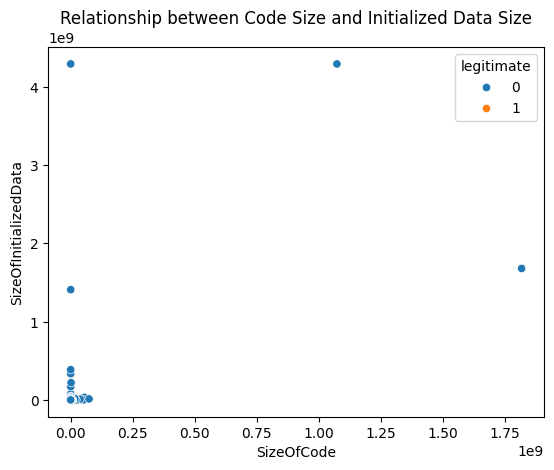

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of a numerical feature by legitimacy
sns.boxplot(x='legitimate', y='SizeOfInitializedData', data=malData)
plt.title('Initialized Data Size by Legitimacy')
plt.show()

# Scatter plot of two numerical features
sns.scatterplot(x='SizeOfCode', y='SizeOfInitializedData', hue='legitimate', data=malData)
plt.title('Relationship between Code Size and Initialized Data Size')
plt.show()

In [5]:
pd.set_option("display.max_columns",None)

In [6]:
print(malData.head(5))

           Name                               md5  Machine  \
0   memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1       ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2     setup.exe  4d92f518527353c0db88a70fddcfd390      332   
3      DW20.EXE  a41e524f8d45f0074fd07805ff0c9b12      332   
4  dwtrig20.exe  c87e561258f2f8650cef999bf643a731      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   
3                   224              258                   9   
4                   224              258                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   
3 

In [7]:
print(legit.take([1]))

      Name                               md5  Machine  SizeOfOptionalHeader  \
1  ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332                   224   

   Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
1             3330                   9                   0      130560   

   SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
1                  19968                        0                81778   

   BaseOfCode  BaseOfData    ImageBase  SectionAlignment  FileAlignment  \
1        4096      143360  771751936.0              4096            512   

   MajorOperatingSystemVersion  MinorOperatingSystemVersion  \
1                            5                            1   

   MajorImageVersion  MinorImageVersion  MajorSubsystemVersion  \
1                  0                  0                      5   

   MinorSubsystemVersion  SizeOfImage  SizeOfHeaders  CheckSum  Subsystem  \
1                      1       159744           1024   

In [8]:
print(mal.take([1]))

                                              Name  \
41324  VirusShare_9bd57c8252948bd2fa651ad372bd4f13   

                                    md5  Machine  SizeOfOptionalHeader  \
41324  9bd57c8252948bd2fa651ad372bd4f13      332                   224   

       Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
41324              271                   6                   0       24064   

       SizeOfInitializedData  SizeOfUninitializedData  AddressOfEntryPoint  \
41324                 164864                     1024                12538   

       BaseOfCode  BaseOfData  ImageBase  SectionAlignment  FileAlignment  \
41324        4096       28672  4194304.0              4096            512   

       MajorOperatingSystemVersion  MinorOperatingSystemVersion  \
41324                            4                            0   

       MajorImageVersion  MinorImageVersion  MajorSubsystemVersion  \
41324                  6                  0                      4  

# Tree classifier
cleaning the data

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [10]:
data_in = malData.drop([ 'Name','md5', 'legitimate'], axis=1).values
labels = malData[ 'legitimate']. values
extratrees = ExtraTreesClassifier(). fit(data_in,labels)
select = SelectFromModel(extratrees,prefit=True)
data_in_new = select. transform(data_in)
print (data_in. shape, data_in_new.shape)

(138047, 54) (138047, 14)


In [11]:
import numpy as np
features = data_in_new.shape[1]
importances = extratrees.feature_importances_
indices = np. argsort(importances) [:: -1]
for f in range (features) :
    print("%d"%(f+1), malData.columns[2+indices[f]], importances[indices [f]])

1 DllCharacteristics 0.15003485898171692
2 Machine 0.1098981695752271
3 Characteristics 0.08533228673096753
4 VersionInformationSize 0.08488024328202101
5 ImageBase 0.061374604461429276
6 SectionsMaxEntropy 0.04661990355536793
7 SizeOfOptionalHeader 0.04503325675079814
8 Subsystem 0.04500519987438471
9 ResourcesMaxEntropy 0.042940138853992116
10 MajorSubsystemVersion 0.04149149447752334
11 ResourcesMinEntropy 0.03757048626939969
12 SectionsMinEntropy 0.024741196395573525
13 MajorOperatingSystemVersion 0.0229939927330957
14 SizeOfStackReserve 0.02019032874162763


In [12]:
from sklearn.ensemble import RandomForestClassifier 
legit_train,legit_test, mal_train, mal_test = train_test_split(data_in_new, labels, test_size=0.2)
classif = RandomForestClassifier(n_estimators=50)
classif.fit(legit_train, mal_train)
classif

RandomForestClassifier(n_estimators=50)

In [13]:
print("The score of the algorithm: ",classif.score(legit_test,mal_test)*100)

The score of the algorithm:  99.3408185440058


In [14]:
from sklearn.metrics import confusion_matrix
result = classif. predict(legit_test)
conf_mat = confusion_matrix(mal_test, result)

In [15]:
conf_mat. shape

(2, 2)

In [16]:
type(conf_mat)

numpy.ndarray

In [17]:
conf_mat

array([[19265,   109],
       [   73,  8163]])

In [18]:
print("False positives: ", conf_mat[0][1]/sum(conf_mat [0])*100)
print ("False negatives: ", conf_mat [1][0]/sum(conf_mat [1]) *100)

False positives:  0.562609683080417
False negatives:  0.8863525983487129


In [19]:
with open('malware_classifier.pkl', 'wb') as f:
     pickle.dump(classif, f)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators=50)
grad_boost. fit(legit_train, mal_train)

GradientBoostingClassifier(n_estimators=50)

In [21]:
 print ("The score of the Gradient Boosting Classifier is:",grad_boost.score(legit_test, mal_test) *100)

The score of the Gradient Boosting Classifier is: 98.76856211517565


In [22]:
from sklearn.metrics import confusion_matrix
result = classif. predict(legit_test)
conf_mat = confusion_matrix(mal_test, result)

In [23]:
conf_mat. shape

(2, 2)

In [24]:
type(conf_mat)

numpy.ndarray

In [25]:
conf_mat

array([[19265,   109],
       [   73,  8163]])

In [26]:
print("False positives: ", conf_mat[0][1]/sum(conf_mat [0])*100)
print ("False negatives: ", conf_mat [1][0]/sum(conf_mat [1]) *100)

False positives:  0.562609683080417
False negatives:  0.8863525983487129


In [27]:
import joblib
joblib.dump(classif, "malware_classifier.pkl")


['malware_classifier.pkl']

Testing the model

In [28]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [29]:
#Load the test dataset
test_data = pd.read_csv("MalwareData.csv", sep="|") 

In [30]:
# Drop unnecessary columns and isolate features and labels
test_features = test_data.drop(['Name', 'md5', 'legitimate'], axis=1)
test_labels = test_data['legitimate']

In [31]:
#Preprocess the test data (feature selection)

test_features_selected = select.transform(test_features)

C:\Users\ritis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
#Load the trained model

import joblib
trained_model = joblib.load("malware_classifier.pkl")

In [33]:
#Make predictions on the test set
test_predictions = trained_model.predict(test_features_selected)


In [34]:
#Evaluate model performance
# Accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.86%


In [35]:
# Classification Report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     96724
           1       1.00      1.00      1.00     41323

    accuracy                           1.00    138047
   macro avg       1.00      1.00      1.00    138047
weighted avg       1.00      1.00      1.00    138047



In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[96610   114]
 [   81 41242]]


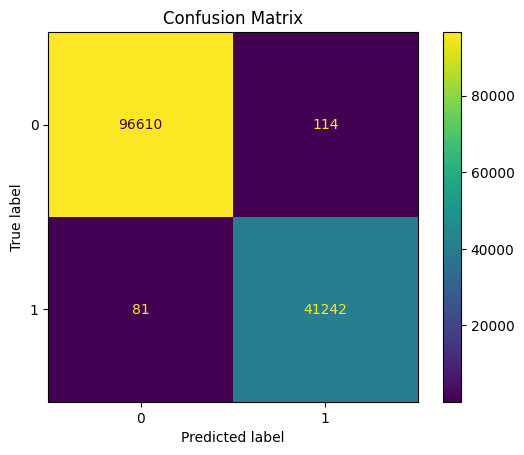

In [37]:
# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=trained_model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
